In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
# This notebook basically is me re-doing the previous multi-layer NN classifier to look for an error in the code
# that has came in somewhere along the way

In [4]:
# Very simple neural network that works on classifying things from the wheat and seeds dataset 
"""In general there are X stages we go through to make a fully functional neural network:
1) Initialise the network 
2) Forward Propagate
3) Back Propagate the error
4) Train Network (i.e. update the weights with training data)
5) Predict on test data
"""

'In general there are X stages we go through to make a fully functional neural network:\n1) Initialise the network \n2) Forward Propagate\n3) Back Propagate the error\n4) Train Network (i.e. update the weights with training data)\n5) Predict on test data\n'

In [5]:
def line(x):
    line = (pow(x,2))+(0.5*x)-1
    return line

In [6]:
def generate_data(num_points, train_perc, plot):
    
    """Inputs : number of points, % of points for training, do you want to plot?
       Outputs: training features, training target, testing features, testing target"""
    
    # define input features
    np.random.seed(1)
    # Creating a random array of x , y points 
    x = np.random.randn(num_points,1)*2
    y = np.random.randn(num_points,1)*2
    
    # Defining a cut off line to split the points into two sections 
    x_line = np.linspace(-150,150,x.size)
    #y_line = (1.5*x_line-25)
    y_line = np.array(list(map(line,x_line)))
    # Generating a third column based on the position of the points on the 2D grid
    u = np.zeros((len(x),1))
    u[(np.array(list(map(line,x))) > y)] = 1
    
    # Concatenating all data
    data = np.concatenate([x,y,u],axis=1)
    
    tr_pt_max = round(num_points*train_perc/100)
    
    # Extracting training data
    train_data = data[0:tr_pt_max,:]
    train_x = train_data[:,(0,1)]
    train_y = train_data[:,2]
    # Extracting test data
    test_data = data[tr_pt_max::,:]
    test_x = test_data[:,(0,1)]
    test_y = test_data[:,2]
        
    # Plotting
    if plot: 
        # Points in group A
        tA = train_x[(train_y==0)] 
        # Points in group B 
        tB = train_x[(train_y==1)]


        # Plotting
        plt.scatter(test_x[:,0],test_x[:,1],label='Test Data')
        plt.scatter(tA[:,0],tA[:,1],label='Training Points A')
        plt.scatter(tB[:,0],tB[:,1],label='Training Points B')
        plt.plot(x_line,y_line,'b',linewidth=5)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.xlim(np.min(test_x[:,0])*0.9,np.max(test_x[:,0])*1.1)
        plt.ylim(np.min(test_x[:,1])*0.9,np.max(test_x[:,1])*1.1)

        plt.legend()
        
    # Reshaping arrays for output
    train_x = train_x.T
    train_y = train_y.T
    
    test_x = test_x.T
    test_y = test_y.T
    
    return train_x, train_y, test_x, test_y

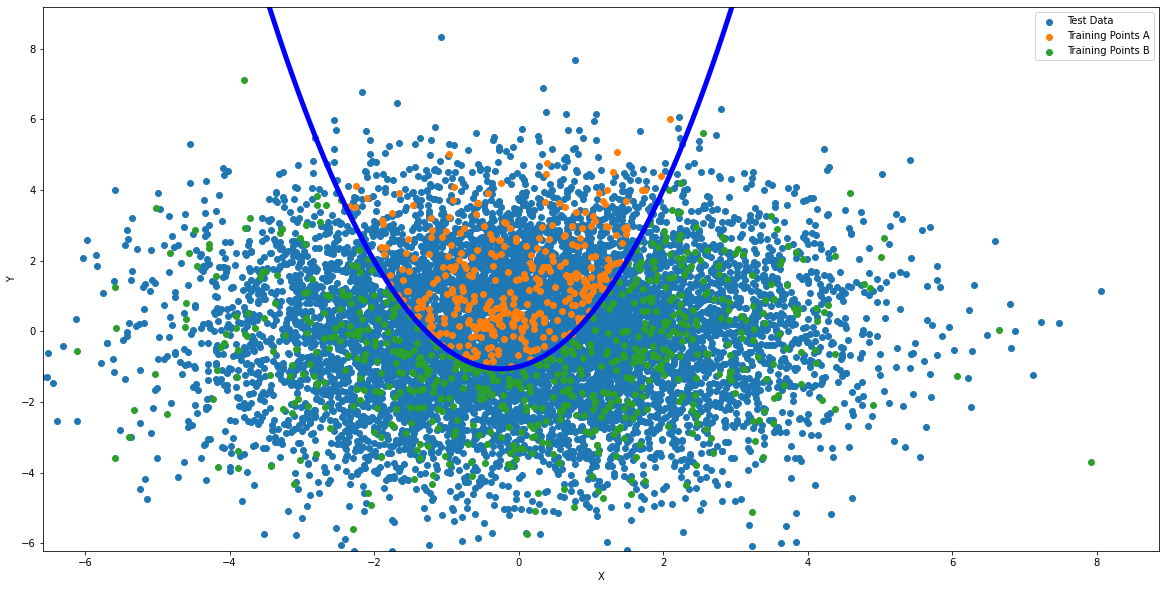

In [14]:
train_x, train_y, test_x, test_y = generate_data(num_points = 10000, train_perc = 10, plot=True)

In [15]:
train_x

array([[ 3.24869073, -1.22351283, -1.0563435 , ..., -0.13924908,
         0.70774085, -0.37391003],
       [-0.24494781,  0.45633964, -0.70461026, ..., -2.70807073,
         1.3961719 , -6.34692327]])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(2, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [18]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics=['accuracy'])

In [19]:
train_x.T

array([[ 3.24869073, -0.24494781],
       [-1.22351283,  0.45633964],
       [-1.0563435 , -0.70461026],
       ...,
       [-0.13924908, -2.70807073],
       [ 0.70774085,  1.3961719 ],
       [-0.37391003, -6.34692327]])

In [20]:
train_y.T

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [ ]:
model.fit(x=train_x,y=train_y,epochs=10)